#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Gulam Kibria Chowdhury<br>
<b>Reg. No:</b> 170103020033

## Assignment 2: Train ADALINE on IRIS data

In [1]:
from sklearn import datasets
import numpy as np  
import matplotlib.pyplot as plt   

In [2]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
#print(X)

# Standardize the data 
X=(X-X.mean(axis=0))/X.std(axis=0)
# y=y.reshape(-1,1)
print('X:',X.shape, '  y:',y.shape)

X: (100, 2)   y: (100,)


In [3]:
y[y==0]=-1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


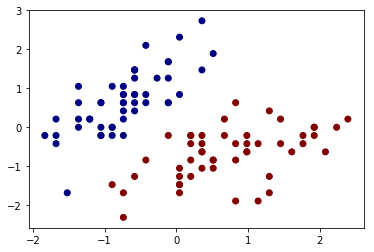

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [5]:
#don't run this cell twice because each time it adds a column full of 1
X=np.c_[np.ones(X.shape[0]), X]  #adding a 1 in the first column to alleviate use of bias. 
print('Data shape:',X.shape)
print('First five data\n',X[:5])

Data shape: (100, 3)
First five data
 [[ 1.         -0.5810659   0.84183714]
 [ 1.         -0.89430898 -0.2078351 ]
 [ 1.         -1.20755205  0.21203379]
 [ 1.         -1.36417359  0.00209934]
 [ 1.         -0.73768744  1.05177159]]


<b>Theory</b> <br>
Let, y=target class, $y_{in}$=preactivation outptu, X= input vectors, w= weights
 
Let, <br>
y: Nx1 <br>
X: NxD<br>
w: 1xD<br>
yin: w.X^T => (1xD).(DxN)=>(1xN)<br>
dw: (1xN) <br>
dw.X: (1xN).(NxD):1xD 

<b>Task 1: Output calculation</b>
net output (preactivation)
$$y_{in}=w.X^T$$

Let, w=np.array( [ 0.3, 0.1, -0.4] )<br>
First five values should be close to the following<br>
[-0.09484145,  0.29370314,  0.09443128,  0.1627429 , -0.19447738]

In [6]:
#your code goes here.

w=np.array([0.3, 0.1, -0.4])
y_in=[]
for i in X[:5]:
    y_in.append(sum(i*w))
print('First five data\n',y_in)

First five data
 [-0.09484144616598017, 0.2937031438718469, 0.09443127739457834, 0.16274290316025708, -0.19447737940461435]


# Task_1 complete ...................

<b>Task 2: Update</b>
update rule.
$$w :=w+ \eta(y-y_{in})X/N $$
which can be written as,<br>
$$dw= y-y_{in} $$
$$w :=w+ \eta(dw.X)/N $$

Let, eta=0.01<br>
Updated w should like below<br>
w=[ 2.22044605e-16,  6.45919846e-01, -6.70091761e-01]

In [7]:
#your code goes here.
w=np.array([0.3,0.1,-0.4])
y_in=[]
for i in X:
    y_in.append(sum(i*w))

eta=0.01
n=len(y)
for i in range(n):
    dw=y[i]-y_in[i]
    w=w+(eta*((dw*X[i])))  # use 𝑤:=𝑤+𝜂(𝑑𝑤.𝑋)........for this output w=[ 2.22044605e-16, 6.45919846e-01, -6.70091761e-01]
         
print("w :",w)

w : [ 2.34187669e-16  6.45919846e-01 -6.70091761e-01]


# Task_2 complete ...................

<b>Task 3: calculate loss</b>
$$E=(y-y_{in})^2$$

Output should look like or close to 0.5782685616058213

In [8]:
#your code goes here.

loss=0
for i in range(0,len(y)):
    loss+=((y[i]-y_in[i])**2)
loss/=len(y)
print("loss: ",loss)

loss:  0.578268561605821


# Task_3 complete ...................

<b>Task 4: Train Adaline</b>

Algorithm.<br>
Choose learning rate eta=0.01 (try with different values)<br>
w=randomly initialize<br>
Repeat the following steps (1,2,3) for n time. Let, say n=1000<br>
1. calculate yin for all the data.
2. $dw=(y-y_{in})$
3. update w. $w :=w+ \eta (dw.x)/N $
4. calculate and record loss

Finally,
print w<br>
Plot loss<br>
Adjust number epoch and re-train<br>
classify all the data  $yout=sign(w.X^T)$<br>
plot decision boundary <br>
Calculate accuracy.

[ 2.38524478e-15  6.12013126e-01 -5.64655071e-01]


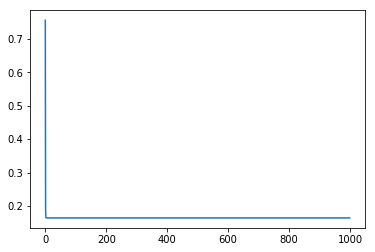

In [9]:
#your code goes here.
eta=0.01
n=1000

w=np.random.rand(len(X[0]))
#print(w)

all_loss=[]
while n>0:  
    y_in=[]
    for i in X:
        y_in.append(sum(i*w))
        
    for i in range(len(X)):
        dw=y[i]-y_in[i]
        w=w+(eta*((dw*X[i])))   # use 𝑤:=𝑤+𝜂(𝑑𝑤.𝑋)........for this output w=[ 2.22044605e-16, 6.45919846e-01, -6.70091761e-01]
         
    loss=0
    for i in range(len(X)):
        loss+=((y[i]-y_in[i])**2)
    loss/=len(X)
    all_loss.append(loss)
    n-=1

print(w)
plt.plot(all_loss)
plt.show()

In [10]:
def sign(a):
    if a>0:
        return 1
    return -1

output_y=[]
for i in X:
    pre=sign(sum(i*w))
    output_y.append(pre)
print(output_y)


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
f=0
for i,j in zip(y,output_y):
    if(i==j):
        f+=1
accuracy_y=(f/len(y))*100
print('accuracy : ',accuracy_y,'%')

accuracy :  99.0 %


# Task_4 complete ...................

<b>Task 5: plot decision boundary</b>

In [12]:
xd=np.arange(-3, 3+1, 0.01)
yd=np.arange(-3,3+1, 0.01)
xx,yy=np.meshgrid(xd,yd)
nx=np.array([xx.flatten(), yy.flatten()]).T
nx=np.c_[np.ones(nx.shape[0]), nx]
nx.shape

(490000, 3)

In [13]:
#your code goes here.
#classify all the data (nx)

def sign(a):
    if a>0:
        return 1
    return -1

out=[]
for i in nx:
    out.append(sign(sum(i*w)))
out=np.array(out)
print(out) 

[-1 -1 -1 ...  1  1  1]


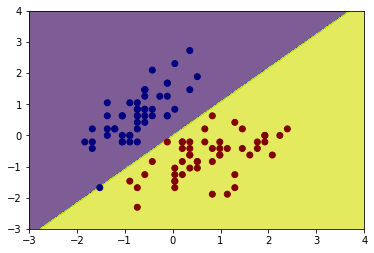

In [14]:
out=out.reshape(xx.shape) 
plt.contourf(xx, yy, out, alpha=0.7 )
plt.scatter(X[:,1],X[:, 2],marker='o', c=y, cmap='jet') 
plt.show()

# Task_5 complete ...................